# Предсказание ранней повторной госпитализации

Задача состоит в предсказании того, будет ли пациент повторно госпитализован на основе данных о пациентах с диабетом.

Набор данных [_Diabetes 130-US hospitals for years 1999-2008 Data Set_](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#) представляет 10 лет (1999-2008) клинической помощи в 130 больницах США. Он включает в себя 50 признаков, представляющих данные больниц и результаты лечения пациентов.

Показатели ранней повторной госпитализации могут служить хорошим признаком качества лекарств и систем здравоохранения в целом. Так частая повторная госпитализация, как правило, означает неэффективность используемых лекарств во время лечения.

Цель: построить некоторую модель, предсказывающую раннюю (в течение месяца) повторную госпитализцаию.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
path1="C:\\Users\\Falirchik\\Desktop\\ML\\diabetic_data.csv"
Y = pd.read_csv(path1 )

Y.head(10)#Output our data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
10. По желанию: запустить другие классификаторы. Сравнить результаты
11. По желанию: как-то побороться с несбалансированностью классов (если она есть)
12. По желанию: исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы

In [3]:
Y.shape

(101766, 50)

Датасет состоит из 101766 записей и 50 признаков.

Отобразим записи в виде таблицы. Отобразим лишь часть (первые 10 записей), для удобства восприятия (ввиду большого количества признаков) транспонируем эту таблицу.

In [4]:
Y.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


Данные состоят из числовых и категориальных признаков. Имеются пропущенные значения. 
Проведем дополнительную предобработку данных.

## Список признаков и их описания

In [5]:
Y.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

сменим тип object на category

In [6]:
for column in Y.select_dtypes(['object']):
    Y[column] = Y[column].astype('category')
    
Y.dtypes

encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type_id              int64
discharge_disposition_id       int64
admission_source_id            int64
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

## входные признаки

### Числовые признаки:
    encounter_id - уникальный идентификатор приема
    patient_nbr - уникальный идентификатор пациента
    time_in_hospital - число дней между поступлением и выпиской
    num_lab_procedures - количество лабораторных тестов, проведенных во время приема
    num_procedures - количество процедур (кроме лабораторных тестов), проведенных во время приема
    num_medications - количество препаратов, назначенных во время приема
    number_outpatient - количество амбулаторных посещений пациента за год, предшествующий приему
    number_emergency - количество экстренных посещений пациента за год, предшествующий приему
    number_inpatient - количество стационарных посещений пациента за год, предшествующий приему
    number_diagnoses - количество диагнозов, введенных в систему
    
### категориальные признаки
    race - расовая принадлежность (принимаемые значения: Caucasian, Asian, African American, Hispanic, and other)
    gender - пол (принимаемые значения: male, female, unknown/invalid)
    age - возраст (значения сгруппированы с интервалом в 10 лет: [0-10), [10-20), ..., [90-100))
    weight - вес в фунтах (значения сгруппированы с интервалом в 25 фунтов: [0-25), ... [175-200), >200)
    admission_type - тип посещения (принимает 9 различных значений, например, emergency, urgent, elective, newborn и др.)
    discharge_disposition - расположение пациента на момент выписки (принимает 29 различных значений, например, discharged to home, expired и др.)
    admission_source - источник обращения (принимает 21 различное значение, например, physician referral, emergency room и др.)
    payer_code - код плательщика, покрывающего медицинские расходы (соответствует 23 различным значениям, например, Medicare, self-pay и др.)
    medical_specialty - медицинская специальность принимающего врача (соответствует 84 различным значениям, например, cardiology, surgeon и др.)
    diag_1 - первичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 848 различных значений)
    diag_2 - вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 923 различных значения)
    diag_3 - дополнительный вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 954 различных значения)
    max_glu_serum - диапазон результата теста на глюкозу в сыворотке крови (значения: None, >200, >300, Norm)
    A1Cresult - диапазон результата теста A1C (тест на гемоглобин) (значения: None, >7, >8, Norm)
    change - признак, показывающий было ли изменение лекарств от диабета (либо дозировки, либо препарата) (значения: change, no change)
    diabetesMed - признак, показывающий были ли назначены лекарства от диабета (значения: yes, no)
    metformin, ..., metformin-pioglitazone - 24 признака, показывающих был ли назначен соответствующий препарат или произошло ли изменение дозировки (значения: up (если увеличили дозировку), down (если уменьшили дозировку), steady (если дозировку не меняли), no (если препарат не был назначен))
    
### выходной признак
    readmitted - категориальный признак, показывающий число дней до повторной госпитализации в стационар (принимаемые значения: <30_ (если пациент был повторно госпитализирован менее чем за 30 дней), _>30 (если пациент был повторно госпитализирован более чем за 30 дней), No (для отсутствия записи о повторной госпитализации))

# описание задачи
Предсказание ранней повторной госпитализации. Признак readmitted показывает число дней до повторной госпитализации. Т.к. в данной задаче важна именно ранняя госпитализация, то можно объединить значения >30 и No в единое значение и заменить его на NO, а значение <30 - на YES, тем самым сведя задачу к бинарной классификации.

In [7]:
Y['readmitted'].unique()  # число уникальных значений признака readmitted

['NO', '>30', '<30']
Categories (3, object): ['<30', '>30', 'NO']

In [8]:
Y['readmitted'] = Y['readmitted'].replace('<30', 'YES').replace('>30', 'NO')
Y['readmitted'].unique()

['NO', 'YES']
Categories (2, object): ['YES', 'NO']

In [9]:
Y.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


# визуализация и предварительный анализ данных

Избавимся от идентификаторов пациента и приема, потому что в нашей задаче они не имеют смысла

In [10]:
Y.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)
Y.shape

(101766, 48)

### Описательная статистика матрицы данных
#### Информация о категориальных признаках

In [11]:
Y.describe(include=['category']).T

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,101766,4,None,96420


Признаки examide и citoglipton принимают только одно значение. Можем от них так же избавиться

In [12]:
Y.drop(['examide', 'citoglipton'], axis=1, inplace=True)
Y.shape

(101766, 46)

#### информация о числовых признаках

In [14]:
Y.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


По таблице можно заметить, что отсутствуют явно выделяющиеся и бессмысленные значения. Следовательно, можно заключить, что нет выбросов.

# визуализация данных

В процессе визуализации могут возникнуть некоторые особенности данных, которые требуется дополнительно изучить. Далее рассмотрим сбалансированность или несбалансированность классов.

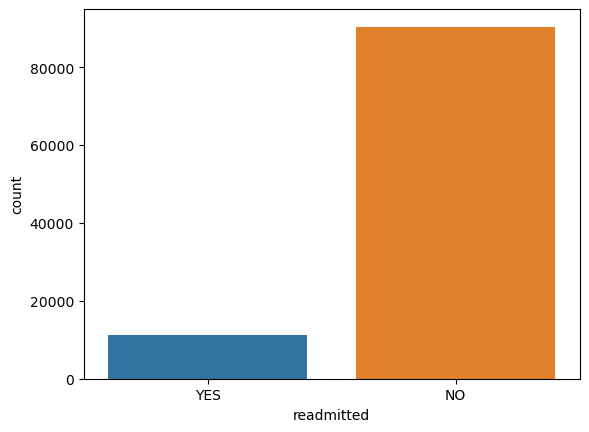

In [15]:
sns.countplot(x='readmitted', data=Y)
pass

Очевидно, что классы несбалансированы. В дальнейшем стоит попытаться устранить эту несбалансированность.

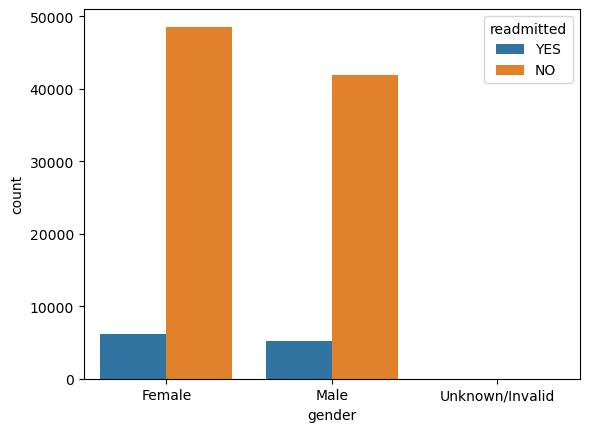

In [16]:
sns.countplot(x='gender', order=Y['gender'].value_counts().index, hue='readmitted', data=Y)
pass

В датасете преобладают женщины, кроме того, присутствуют невалидные значения, которые следует удалить для лучшей обработки данных.

In [18]:
rows_with_invalid_gender = Y[Y['gender'] == 'Unknown/Invalid']  # строки с невалидными значениями признака gender

len(rows_with_invalid_gender)  # число таких строк

3

Количество таких значений незначительно, поэтому их можно без проблем удалить (удалить соответствующие строки из таблицы).

In [19]:
Y.drop(rows_with_invalid_gender.index, axis=0, inplace=True)  # удаляем из таблицы

len(Y[Y['gender'] == 'Unknown/Invalid'])  # число строк с невалидными значениями признака gender после удаления

0

Посмотрим на возраст повторно госпитализируемых

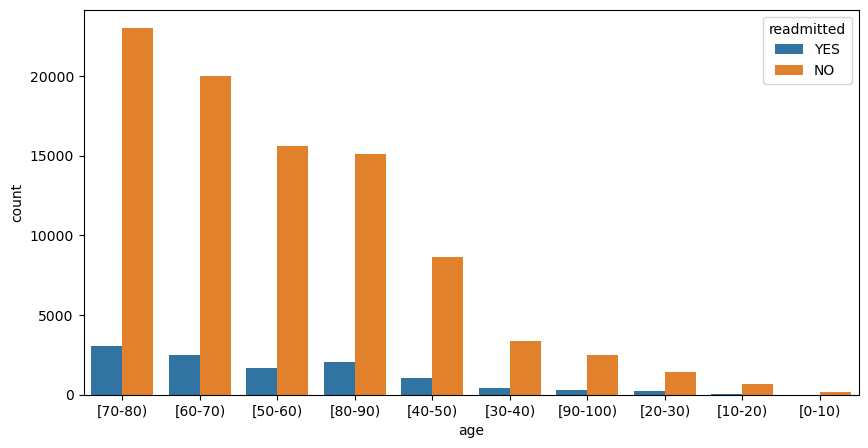

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', order=Y['age'].value_counts().index, hue='readmitted', data=Y)
pass

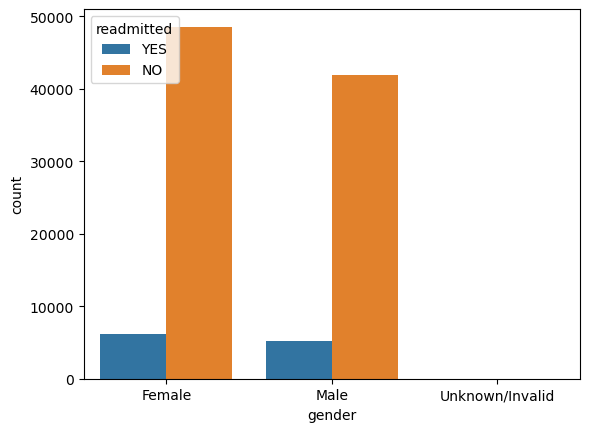